In [71]:
import pandas as pd
import numpy as np
import random
import math

#creating data frame
csv = "./loan_data.csv"
df = pd.read_csv(csv)


In [72]:
#1.1 Know Your Data

In [73]:
#Q1 Printing first 5 lines of data frame

In [74]:
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [75]:
#Q2 getting count, std, mean, percentiles, min/max, of each column

In [76]:
count = df.count()
mean = df.mean(numeric_only=True)
std = df.std(numeric_only=True)
lower_percentile = df.quantile(q=0.25)
mid_percentile = df.quantile(q=0.5)
upper_percentile = df.quantile(q=0.75)
minimum = df.min()
maximum = df.max()

print("\nCount")
print(count)
print("\nMean")
print(mean)
print("\nStandard Deviation")
print(std)
print("\n25th Percentile")
print(lower_percentile)
print("\n50th Percentile")
print(mid_percentile)
print("\n75th Percentile")
print(upper_percentile)
print("\nMin")
print(minimum)
print("\nMax")
print(maximum)



Count
credit.policy        9577
purpose              9577
int.rate             9577
installment          9577
log.annual.inc       9577
dti                  9577
fico                 9577
days.with.cr.line    9577
revol.bal            9577
revol.util           9577
inq.last.6mths       9577
delinq.2yrs          9577
pub.rec              9577
not.fully.paid       9577
dtype: int64

Mean
credit.policy            0.805054
int.rate                 0.122638
installment            319.033619
log.annual.inc          10.932082
dti                     12.606295
fico                   710.844106
days.with.cr.line     4560.748482
revol.bal            16911.774773
revol.util              46.798171
inq.last.6mths           1.577007
delinq.2yrs              0.163726
pub.rec                  0.062128
not.fully.paid           0.159967
dtype: float64

Standard Deviation
credit.policy            0.396180
int.rate                 0.026848
installment            207.010102
log.annual.inc           0.6148

In [77]:
#Q3 Showcasing Breakdown of credit policy

In [78]:
#Create df where its all approved records
approved = df[df['credit.policy'] > 0]

#Create df where its all unapproved records
unapproved = df[df['credit.policy'] == 0]

unapproved

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
7710,0,debt_consolidation,0.1608,35.20,10.308953,23.84,642,2490.000000,10125,90.4,1,0,0,0
7711,0,debt_consolidation,0.1608,246.38,12.152144,22.47,647,7212.000000,150971,92.3,4,0,0,1
7712,0,debt_consolidation,0.1600,787.53,11.264464,19.34,682,3780.041667,15897,66.0,5,0,1,0
7713,0,educational,0.1640,126.40,10.308953,29.60,677,1643.000000,3043,58.5,1,0,0,1
7714,0,debt_consolidation,0.1482,242.05,10.714418,19.12,652,2847.000000,26531,52.6,33,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1


In [79]:
#Q4 Histograms of approved and unapproved

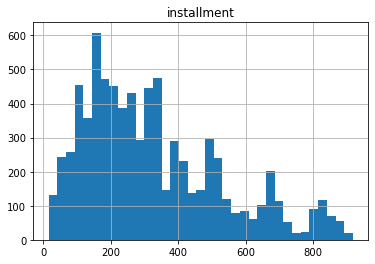

In [80]:
approvedHist = approved.hist(column='installment', bins=35)

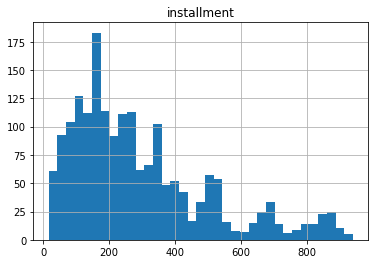

In [81]:
unapprovedHist = unapproved.hist(column='installment', bins=35)

In [82]:
#Q5 Boxplots of Fico Score for approved and unapproved

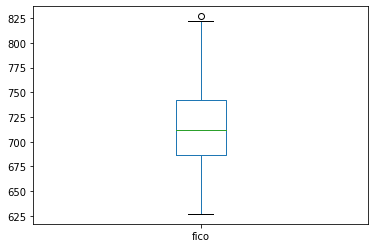

In [83]:
approvedFico = approved.boxplot(column='fico', grid=False)

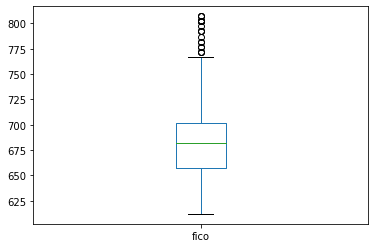

In [84]:
unapprovedFico = unapproved.boxplot(column='fico', grid=False)

In [85]:
#1.2.1 Data Preprocessing and Splitting

In [ ]:
#Convert Categorical values into binary values in order for scikit learn to work with data

In [86]:
#Only need to run this once, if run again will push error because the purpose no longer in our  dataset
df = pd.get_dummies(df, columns=['purpose'])

In [87]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0


In [ ]:
#Split our data set into trainging and testing data

In [88]:
#Training data set
print(len(df))
upper = math.ceil(0.70*len(df))
#Permuation permutate (lendf) objects and returns and arrays of size lendf and the perm. Use upper to then slice by how many rows u want
rows = np.random.permutation(len(df))[:upper]
trainingDF = df.take(rows)
trainingDF


9577


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
9318,0,0.1670,568.03,11.918391,15.70,687,6149.958333,5306,96.5,6,0,1,0,0,0,1,0,0,0,0
6659,1,0.1531,870.39,11.982929,16.36,697,3120.041667,31756,45.2,1,0,0,0,0,0,1,0,0,0,0
4478,1,0.0859,126.45,10.085809,21.85,737,2250.000000,1733,10.9,1,0,0,0,0,0,1,0,0,0,0
1056,1,0.1292,168.28,10.596535,16.29,667,2729.958333,14244,85.8,2,0,0,0,0,0,1,0,0,0,0
4157,1,0.1426,514.59,10.858999,19.68,687,3313.000000,22918,90.9,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,1,0.1426,686.12,12.100712,0.20,707,5222.041667,255,0.8,0,1,0,0,0,0,0,0,0,1,0
1089,1,0.0800,206.83,9.942708,10.04,767,3449.958333,7797,72.2,0,0,0,0,0,1,0,0,0,0,0
3749,1,0.1347,305.31,11.686879,22.61,682,7230.000000,75723,92.9,2,0,0,0,0,0,1,0,0,0,0
4345,1,0.1704,249.72,10.596635,6.90,702,4320.000000,5035,76.0,1,1,0,1,0,0,0,0,0,0,1


In [89]:
#Testing Data frame
rows = np.setdiff1d(df.index, trainingDF.index)
testingDF = df.take(rows)
testingDF


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
10,1,0.1347,360.43,10.434116,22.09,677,6713.041667,13846,71.0,2,0,1,0,0,0,1,0,0,0,0
12,1,0.0859,316.11,10.933107,15.49,767,6519.958333,6068,16.7,0,0,0,0,0,0,1,0,0,0,0
13,1,0.0714,92.82,11.512925,6.50,747,4384.000000,3021,4.8,0,1,0,0,0,0,0,0,0,0,1
22,1,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0,0,1,0,0,0,0,0
23,1,0.0788,484.85,11.736069,7.05,782,5640.041667,16931,34.6,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9568,0,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0,1,0,0,0,0,0,0
9570,0,0.1671,113.63,10.645425,28.06,672,3210.041667,25759,63.8,5,0,0,1,1,0,0,0,0,0,0
9571,0,0.1568,161.01,11.225243,8.00,677,7230.000000,6909,29.2,4,0,1,1,1,0,0,0,0,0,0
9572,0,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1,0,0,1,0,0,0,0


In [90]:
#1.2.2 Training a Decision Tree

In [96]:
#Using IG on training data

In [100]:
#How I split Randomly each fold
#Start with a list of the available indices that can be used for the validation set
#Then randomly select from that list 670 indices for the val set(10%)
#Use set difference to take away the indices you selected so that we dont have overlapping validation sets.
#Those indices will be taken(take function) to create validation set
#Use set difference on valid set to get the indices that will be used on fold traininset1

#note last fold will have 674 element in valid set due to rounding

In [314]:
numOfValRecs = math.floor(0.10 * len(trainingDF))

#Allows us to make changes to our list of availble indices with out impacting our DF indices
available = np.array(trainingDF.index)



[]
6034


In [311]:
#Trainingdf = dataset that being split for folds, available = list of which records have not been used for valid set yet, and number of valid records you want
#On the last iteration run this with numofvalrecs = 674
def createFold(trainingDF, available, numOfValRecs):
    #passing in len(Avalible) select 670 random nums between 0-len available(6704 to start)
    #NOTE: validsrows1 holds the positional indices to select from trainingDF not the actual indices
    validrows1 = np.random.permutation(len(available))[:numOfValRecs] 

    #delete the rows from avaliable that we are going to be using for the valid set on this fold 
    available = np.delete(available, validrows1) 

    #collect the positional rows(not based on df's indexing) from our data frame that will be in our valid set for this training fold
    validationFold1 = trainingDF.take(validrows1)

    #collect the training dataframe rows positions for this fold. Whatever is not in the validation set
    #NOTE: use arange to get all the possible positions of our data frame, and whats being used in valid rows
    trainingrows1 = np.setdiff1d(np.arange(len(trainingDF)), validrows1)

    #testing to make sure that they are not overlapping
    print(np.intersect1d(trainingrows1, validrows1))

    #collect the positional row for the training set of this fold
    trainingFold1 = trainingDF.take(trainingrows1)

    print(len(available))

    
    return available, validationFold1, trainingFold1 

In [316]:
#Call this for each fold done
available, validationFold, trainingFold = createFold(trainingDF, available, numOfValRecs)

[]
5364
<class 'numpy.ndarray'>


<class 'NoneType'>


In [317]:
validationFold
#print(len(trainingFold1))
#print(rows)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
3999,1,0.1095,327.14,10.819778,8.90,727,3179.958333,6048,26.8,1,0,0,0,0,0,1,0,0,0,0
449,1,0.0775,124.89,11.082143,9.25,757,5010.041667,3348,5.3,0,0,0,0,0,0,0,0,1,0,0
9035,0,0.1758,790.73,12.264342,20.46,667,5249.958333,40604,65.0,4,0,0,1,0,0,1,0,0,0,0
4784,1,0.1218,499.50,10.799576,16.97,722,4200.958333,11530,49.1,0,0,0,0,0,1,0,0,0,0,0
8870,0,0.1221,186.57,10.915088,4.36,702,11070.041670,6788,26.7,5,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,1,0.1411,676.02,11.082143,18.85,702,8250.000000,11667,33.1,1,0,0,1,0,0,1,0,0,0,0
5132,1,0.1287,44.57,10.165852,19.29,702,2819.958333,20493,95.3,0,0,0,1,0,0,0,1,0,0,0
6084,1,0.1496,291.02,10.396902,13.92,667,5370.000000,9713,63.5,1,1,0,0,0,0,1,0,0,0,0
7128,1,0.0714,154.70,11.492723,8.33,752,7350.000000,28209,58.4,0,0,0,0,0,0,0,0,0,1,0


In [318]:
trainingFold

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
9318,0,0.1670,568.03,11.918391,15.70,687,6149.958333,5306,96.5,6,0,1,0,0,0,1,0,0,0,0
6659,1,0.1531,870.39,11.982929,16.36,697,3120.041667,31756,45.2,1,0,0,0,0,0,1,0,0,0,0
4478,1,0.0859,126.45,10.085809,21.85,737,2250.000000,1733,10.9,1,0,0,0,0,0,1,0,0,0,0
1056,1,0.1292,168.28,10.596535,16.29,667,2729.958333,14244,85.8,2,0,0,0,0,0,1,0,0,0,0
4157,1,0.1426,514.59,10.858999,19.68,687,3313.000000,22918,90.9,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,1,0.1426,686.12,12.100712,0.20,707,5222.041667,255,0.8,0,1,0,0,0,0,0,0,0,1,0
1089,1,0.0800,206.83,9.942708,10.04,767,3449.958333,7797,72.2,0,0,0,0,0,1,0,0,0,0,0
3749,1,0.1347,305.31,11.686879,22.61,682,7230.000000,75723,92.9,2,0,0,0,0,0,1,0,0,0,0
4345,1,0.1704,249.72,10.596635,6.90,702,4320.000000,5035,76.0,1,1,0,1,0,0,0,0,0,0,1
